# TODOs

- [ ] Verschiedene Modelle trainiert
- [ ] Verschiedene Modelle visualisiert
- [ ] Verschiedene Modelle quantitativ gegenübergestellt (Training- und Testfehler)
- [ ] Ein Modell durch Hyperparametersuche verbessern/verschlechtern
- [ ] Benefit durch Feature-Engineering zeigen

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
if '_ORIGINAL_PRINTOPTIONS' not in globals():
    import builtins
    _ORIGINAL_PRINTOPTIONS = np.get_printoptions()
    np.set_printoptions(threshold=10, edgeitems=2, linewidth=80, suppress=True)
    def print(*args, **kwargs):
        with np.printoptions(**_ORIGINAL_PRINTOPTIONS):
            return builtins.print(*args, **kwargs)

# Example 1

## 📊 Dataset

In [3]:
# Generate an artificial dataset
X, y = make_moons(
    n_samples=100,
    noise=0.1
)
X, y

(array([[ 1.77648999,  0.11491085],
        [ 0.13994098,  0.9669085 ],
        ...,
        [-0.76417527,  0.6840337 ],
        [-0.4977863 ,  0.83367952]], shape=(100, 2)),
 array([1, 0, ..., 0, 0], shape=(100,)))

In [4]:
print(y)

[1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0]


In [5]:
pd.DataFrame(
    {
        "Feature 1": X[:, 0],
        "Feature 2": X[:, 1],
        "Label": y
    }
)

,Feature 1,Feature 2,Label
0,1.776490,0.114911,1
1,0.139941,0.966908,0
2,1.050917,-0.693650,1
3,1.662686,-0.215424,1
4,1.828242,-0.212163,1
...,...,...,...
95,-0.978540,0.108126,0
96,-0.839466,0.515157,0
97,0.751933,0.684043,0
98,-0.764175,0.684034,0


### Split: Train vs. Test

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 1.6525807 , -0.26220502],
        [-0.52860832,  0.88278252],
        ...,
        [ 0.93674444,  0.49293563],
        [ 1.08146546, -0.61016972]], shape=(70, 2)),
 array([[ 0.99755879, -0.50778643],
        [ 0.07371985,  0.18075289],
        ...,
        [-0.29749981,  1.01540867],
        [-0.07108711,  1.03691239]], shape=(30, 2)),
 array([1, 0, ..., 0, 1], shape=(70,)),
 array([1, 1, ..., 0, 0], shape=(30,)))

### Show Plot

In [7]:
def plot_2d_data(X, y, X_test=None, y_test=None, *, model=None, title="Model Decision Boundaries"):
    """
    Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - X: The feature set (training data) of shape (N_samples, 2)
    - y: The target labels for the training data (binary class labels)
    - model: A trained classifier model
    - X_test: (optional) The feature set for the test samples (same shape as X)
    - y_test: (optional) The target labels for the test data
    - title: Title of the plot
    """
    if model is not None:
        # Create a plot with decision boundaries using DecisionBoundaryDisplay
        X_ = np.concat((X, X_test)) if X_test is not None else X
        DecisionBoundaryDisplay.from_estimator(
            model, X_, response_method="predict", cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]), alpha=0.6, eps=0.5
        )
    else:
        plt.figure()

    # Plot the training points
    neg_idx = y==0
    X_neg, X_pos = X[neg_idx], X[~neg_idx]
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="o", edgecolors="k", label="Train samples (class 0)", s=100)
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="o", edgecolors="k", label="Train samples (class 1)", s=100)

    # Plot test data if provided with different symbol
    if X_test is not None and y_test is not None:
        neg_idx = y_test==0
        X_neg, X_pos = X_test[neg_idx], X_test[~neg_idx]
        plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="x", label="Test samples (class 0)", s=150, linewidths=2)
        plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="x", label="Test samples (class 1)", s=150, linewidths=2)

    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1.025))
    plt.grid(True)
    plt.show()

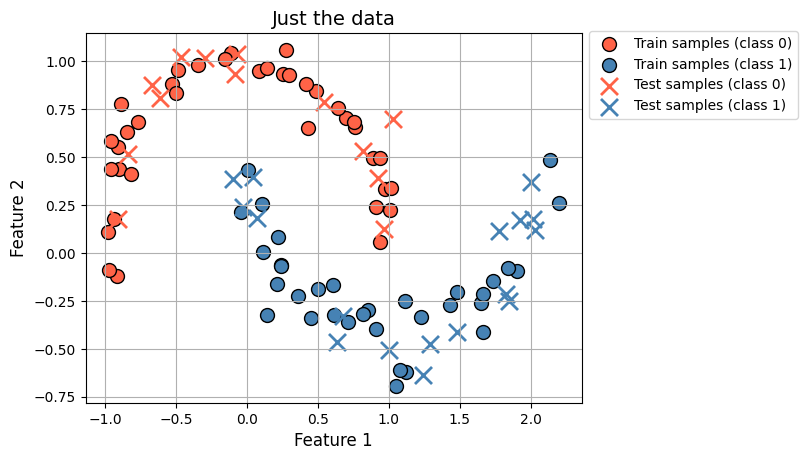

In [8]:
plot_2d_data(X_train, y_train, X_test, y_test, title="Just the data")

## ✨ Model 🤖

### Training

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Evaluate = Test...

#### ...visually

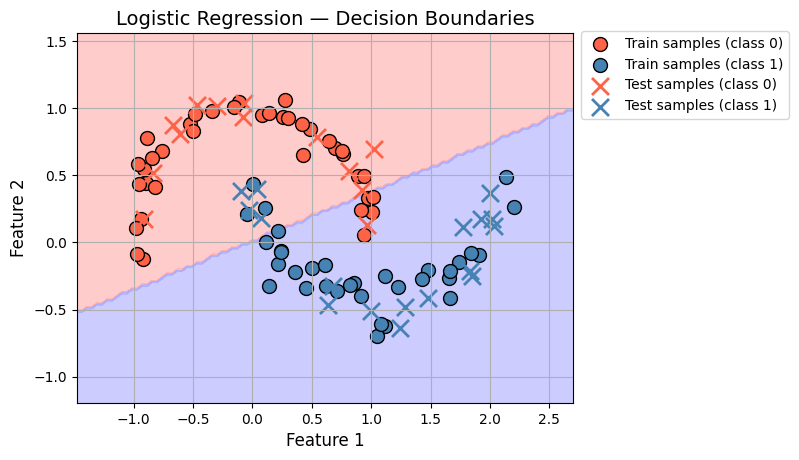

In [10]:
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Logistic Regression — Decision Boundaries")

#### ...quantitatively

In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred, y_test_pred

(array([1, 0, ..., 0, 1], shape=(70,)), array([1, 0, ..., 0, 0], shape=(30,)))

In [12]:
def accuracy(y_pred, y_true):
    print("Accuracy:", (y_pred==y_true).sum() / len(y_pred))

In [13]:
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

Accuracy: 0.8857142857142857
Accuracy: 0.8333333333333334


## 💻 YOUR TURN — Train Your Own Model

1. Pick a model from the list:
    - [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#)
    - [Support Vector Machine (linear)](https://scikit-learn.org/1.6/modules/generated/sklearn.svm.LinearSVC.html#)
    - [Support Vector Classifier (beyond linear)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    - ...
2. Perform training
3. Visualize the model
4. Evaluate the model using accuracy

---

If you have time you can check out a model comparison from scikit-learn $\rightarrow$ Click to [launch another binder](https://mybinder.org/v2/gh/scikit-learn/scikit-learn/1.6.X?urlpath=lab/tree/notebooks/auto_examples/classification/plot_classifier_comparison.ipynb)

In [14]:
# instantiate and train the model

# visualize the model

# perform predictions

# compute accuracy

### Solution

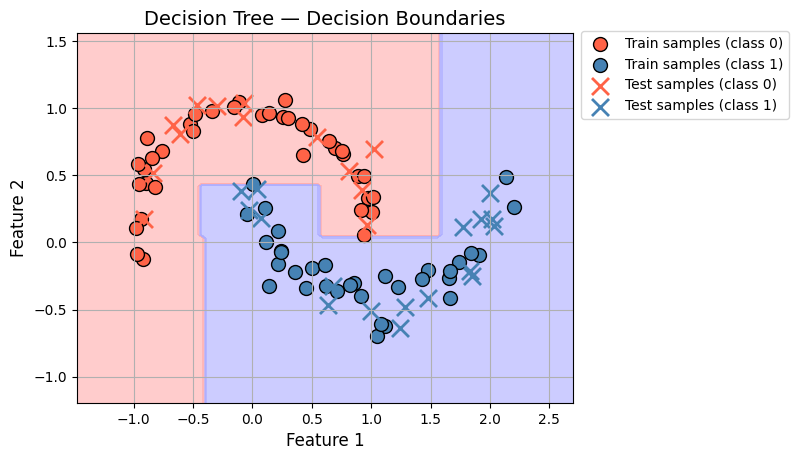

Accuracy: 1.0
Accuracy: 1.0


In [15]:
from sklearn.tree import DecisionTreeClassifier

# create basic model instance and train
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundaries")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

In [16]:
from sklearn.tree import plot_tree

def visualize_decision_tree(model, save_path=None):
    plt.figure(figsize=(8, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=["feature 1", "feature2"],
        class_names=['0', '1'],
        rounded=True,
        #fontsize=40
    )
    if save_path:
        plt.savefig(save_path)
    plt.show()

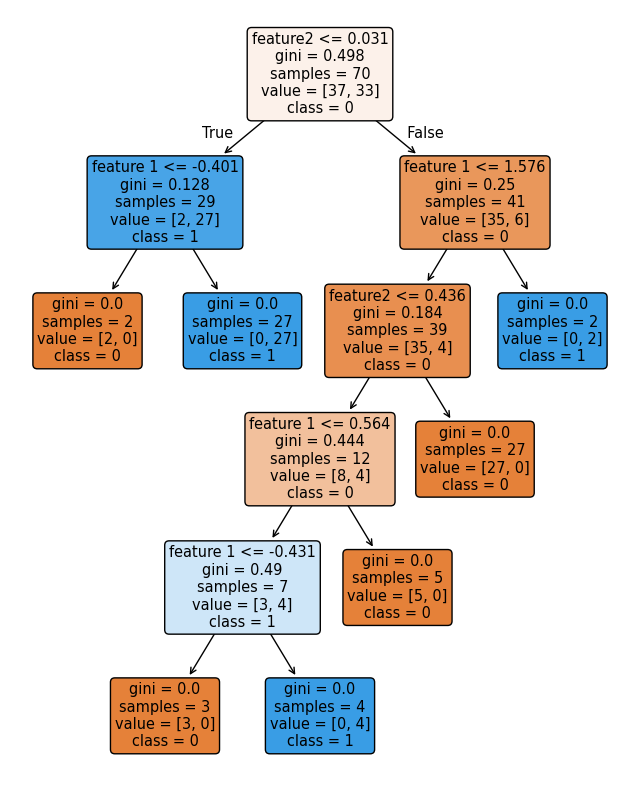

In [17]:
visualize_decision_tree(model)

## 🔎 Look under the hood (Mathematical)

### Mathematical Explanation

🧠 How A **Logistic Regression** Model Works

We want a **classifier** that can learn from data — meaning, it can look at examples and figure out how to make good predictions for new data.

To do this, we define a function that takes in a data sample $x$ and transforms it using the equation:

$$
f(x) = w^\top x + b
$$

This is a **linear transformation** (actually **affine**, because of the bias $b$), where:

- $w$ = weights (one per feature)
- $b$ = bias (a constant offset)

These are the so-called **learnable parameters** of the model.  
Learning means the algorithm tries to find the right values for $w$ and $b$ that make the model give good predictions.

---

🎯 What does "good" mean?

In this case, "good" means making predictions that match the true labels $y$.  
But here’s the twist: $f(x)$ can be any real number from $-\infty$ to $+\infty$. That's not helpful when we want a **probability** (a number between $0$ and $1$).

So we apply a **non-linear squashing function** called the **sigmoid** (google it; is the CDF of a gaussian distribution):

$$
\sigma(z) = \frac{1}{1 + \text{exp}(-z)} \in (0, 1)
$$

Putting it together:

$$
\tilde{y} = \sigma(f(x)) = \sigma(w^\top x + b)
$$

Now $\tilde{y}$ (aka `y_pred`) is the predicted probability that the class is $1$.

---

⚙️ How does the model learn?

<u>**TL;DR**</u>

We compare the predicted value `y_pred` with the true label `y_true`, and compute the **loss** using the **binary cross-entropy** (log loss).  
This tells us how "bad" a prediction is.

Then we use **gradient descent** to update the parameters $w$ and $b$ to **minimize the loss**.  
> In the shower, you tweak some knobs to balance hot and cold and water in order to find the right temperature. This is the same here, $w$ and $b$ are the knobs that can be tweaked (search for the best mix) in order to find the model that forms the right results often!

In other words, we take small steps in the direction that makes the model better at predicting.

We repeat this process for many iterations (epochs), and the model gradually learns better parameters.

<u>**Long Version:**</u>

We compare the predicted value $\tilde{y} = \sigma(w^\top x + b)$ with the true label $y$, and compute the **loss** using **binary cross-entropy**:

$$
\mathcal{l}(w, b) = - \left[ y \log(\tilde{y}) + (1 - y) \log(1 - \tilde{y}) \right]
$$

For the whole dataset:

$$
\mathcal{L}(w, b) = \frac{1}{n} \sum_{i=1}^n \mathcal{l}^{(i)} = - \frac{1}{n} \sum_{i=1}^n \left[ y^{(i)} \log(\tilde{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \tilde{y}^{(i)}) \right]
$$

To make $\tilde{y}$ close to $y$, we minimize this loss using **gradient descent**.  
That means we compute the gradients of the loss with respect to the parameters:

- Gradient w.r.t. weights:
  $$
  \frac{\partial \mathcal{L}}{\partial w} = \frac{1}{n} \sum_{i=1}^n (\tilde{y}^{(i)} - y^{(i)}) \cdot x^{(i)}
  $$

- Gradient w.r.t. bias:
  $$
  \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\tilde{y}^{(i)} - y^{(i)})
  $$

We update $w$ and $b$ by taking small steps in the negative gradient direction.  
Repeat this many times, and the model gradually improves (loss is convex on $w$ and $b$).

---

How do we make predictions?

Once training is done, we **keep the learned $w$ and $b$**, and for any new data sample $x$, we just compute:

$$
\tilde{y} = \sigma(w^\top x + b)
$$

If $\tilde{y} \gt 0.5$, we predict class $1$; otherwise, class $0$.

---

🤖 BONUS

Neural networks do the exact same thing — **but instead of just one transformation**, they chain many of them together.  
Each layer applies a function like $f(x) = Wx + b$, followed by a non-linear activation, and the entire network is trained using the same idea: **gradient descent on a loss function**.

So logistic regression is the simplest building block of deep learning.

### Logistic Regression From Scratch

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # Gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # gradient of loss wrt. weights vector
            db = (1 / n_samples) * np.sum(y_pred - y)  # derivative of loss wrt. bias scalar

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        # for sklearn compatibility
        self.coef_ = self.weights
        self.intercept_ = self.bias
        self.classes_ = np.unique(y)
        self.n_features_in_ = X.shape[1]

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba > 0.5).astype(int)

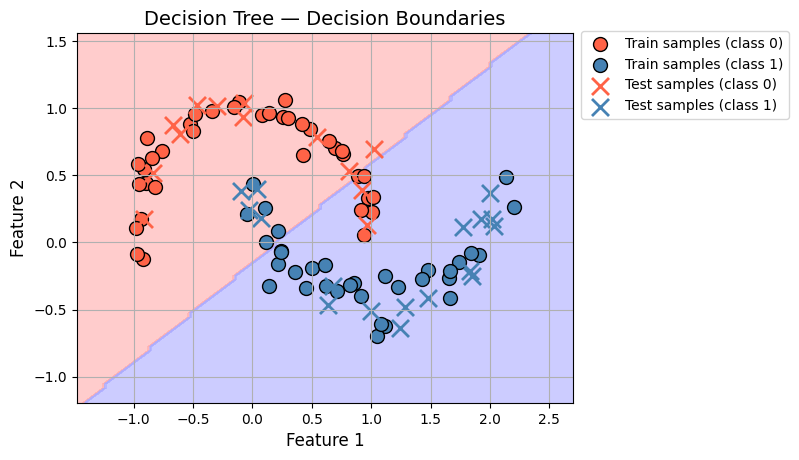

Accuracy: 0.8285714285714286
Accuracy: 0.8


In [19]:
model = MyLogisticRegression()
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundaries")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

In [25]:
! open .

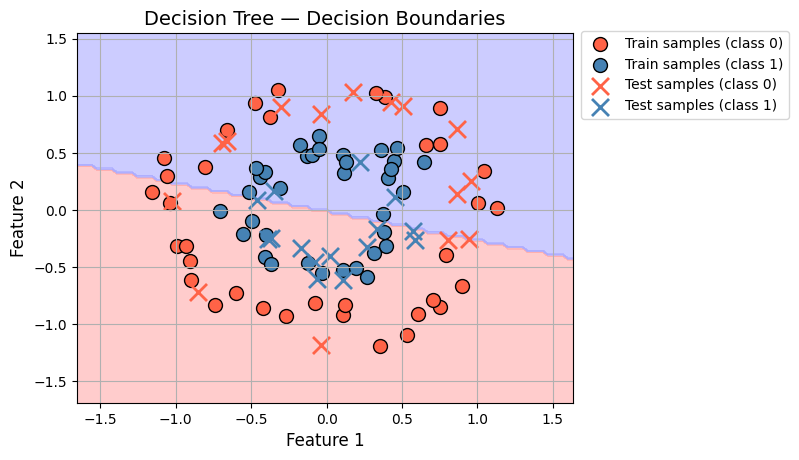

Accuracy: 0.5857142857142857
Accuracy: 0.23333333333333334


In [20]:
def foo():
    X, y = make_circles(  # Or use make_moons(n_samples=100, noise=0.1)
        n_samples=100,
        factor=0.5,
        noise=0.1
    )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = MyLogisticRegression()
    model.fit(X_train, y_train)
    
    # evaluate model visually
    plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundaries")
    
    # perform predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate model quantitatively
    accuracy(y_train_pred, y_train)
    accuracy(y_test_pred, y_test)
foo()

# Example 2

## 📊 Dataset

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [22]:
from sklearn.datasets import load_iris

iris_dict = load_iris(return_X_y=False, as_frame=True)
df = iris_dict["frame"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
df.value_counts("target")

target
0    50
1    50
2    50
Name: count, dtype: int64

### Split: Train vs. Test

In [24]:
X = iris_dict["data"].values
y = iris_dict["target"].values
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        ...,
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]], shape=(150, 4)),
 array([0, 0, ..., 2, 2], shape=(150,)))

### Show Plot

We cannot really plot the data well anymore, as there are too many dimensions. We could try to apply some dimensionality reduction or play around with using colors and shapes as additional dimensions on top of the cartesian axes, **but you get the point: more dimensions $\implies$ harder to visualize.**

We can also perform some exploratory data analysis here, check distributions per feature, check correlations between features, etc. but we are not interested in that right now.

**Instead, let's see how we can now apply machine learning to find the best model to this problem**

## ✨ Model 🤖

### Training

### Evaluate = Test...

#### ...visually

#### ...quantitavely